In [1]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

O problema de negócio que estamos querendo prever é o seguinte:

<b>Trabalhamos para uma grande empresa de joalheria. Queremos comprar diamantes, e o lance deve ser no valor de 70% das predições do modelo, para que a empresa possa ter lucro. 

Agora vamos levantar algumas perguntas e hipóteses, para que possamos investigar os dados e trazer respostas para o problema que precisamos resolver. 

- De acordo com o modelo, se um diamante é 1 quilate mais pesado do que o outro com o mesmo corte, quanto deveríamos pagar a mais por ele? Por quê?
- Se você está interessado em um diamante de 1.5 quilates com um corte very good (muito bom) (representado por um 3 no modelo) e uma claridade VS2 (representada por 5 no modelo), quanto o modelo prediz que você irá pagar por ele?
- Qual preço de lance você recomenda para a joalheria? Explique como você chegou a este número.

In [2]:
df = pd.read_csv('Diamonds.csv', sep=',')
df

,Unnamed: 0,Unnamed: 0.1,carat,cut,cut_ord,color,clarity,clarity_ord,price
0,0,1,0.51,Premium,4,F,VS1,4,1749
1,1,2,2.25,Fair,1,G,I1,1,7069
2,2,3,0.70,Very Good,3,E,VS2,5,2757
3,3,4,0.47,Good,2,F,VS1,4,1243
4,4,5,0.30,Ideal,5,G,VVS1,7,789
5,5,6,0.33,Ideal,5,D,SI1,3,728
6,6,7,2.01,Very Good,3,G,SI1,3,18398
7,7,8,0.51,Ideal,5,F,VVS2,6,2203
8,8,9,1.70,Premium,4,D,SI1,3,15100
9,9,10,0.53,Premium,4,D,VS2,5,1857


In [3]:
del df['Unnamed: 0']
del df['Unnamed: 0.1']
del df['color']

In [4]:
df

,carat,cut,cut_ord,clarity,clarity_ord,price
0,0.51,Premium,4,VS1,4,1749
1,2.25,Fair,1,I1,1,7069
2,0.70,Very Good,3,VS2,5,2757
3,0.47,Good,2,VS1,4,1243
4,0.30,Ideal,5,VVS1,7,789
5,0.33,Ideal,5,SI1,3,728
6,2.01,Very Good,3,SI1,3,18398
7,0.51,Ideal,5,VVS2,6,2203
8,1.70,Premium,4,SI1,3,15100
9,0.53,Premium,4,VS2,5,1857


<i> O arquivo já está transformado. Mas caso as colunas cut e clarity não estivessem poderíamos fazer isso através de transformação dos dados. Vamos gerar o modelo. 
    

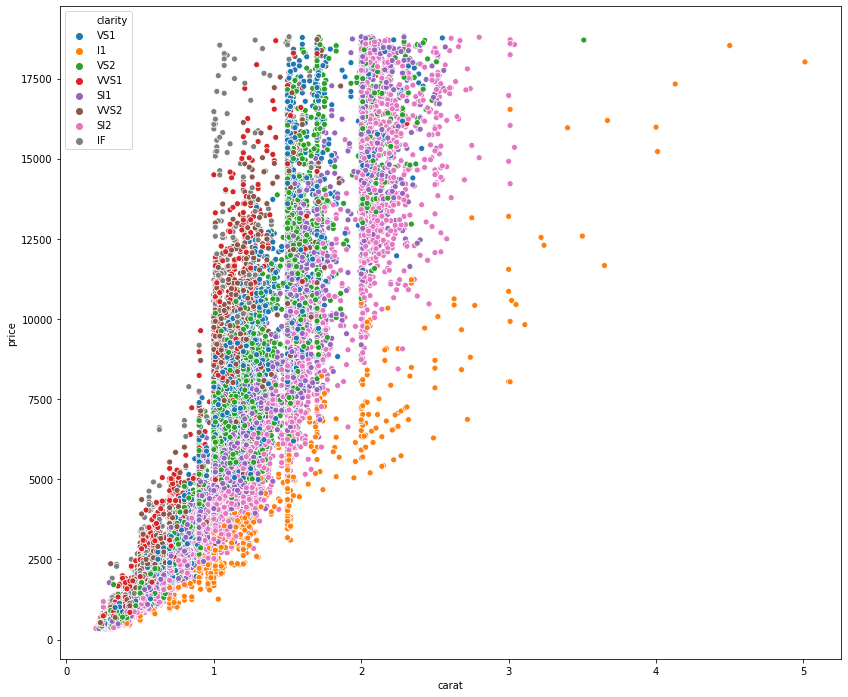

In [5]:
plt.figure(figsize=(14,12))
sns.scatterplot(x="carat", y="price",
                hue="clarity", data=df)

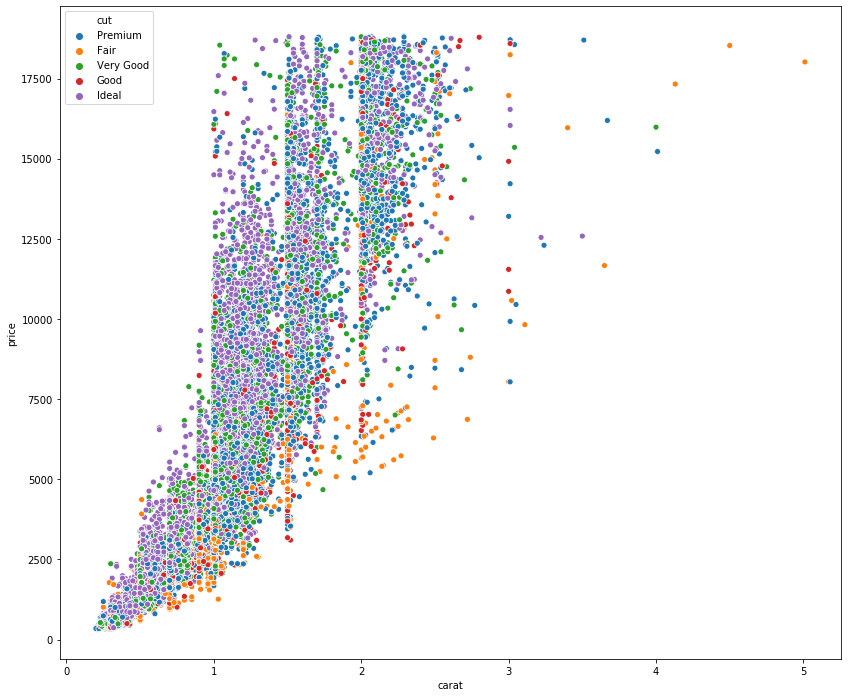

In [6]:
plt.figure(figsize=(14,12))
sns.scatterplot(x="carat", y="price",
                hue="cut", data=df)

In [7]:
df.corr()

,carat,cut_ord,clarity_ord,price
carat,1.000000,-0.135679,-0.343725,0.921777
cut_ord,-0.135679,1.000000,0.189461,-0.053804
clarity_ord,-0.343725,0.189461,1.000000,-0.142159
price,0.921777,-0.053804,-0.142159,1.000000


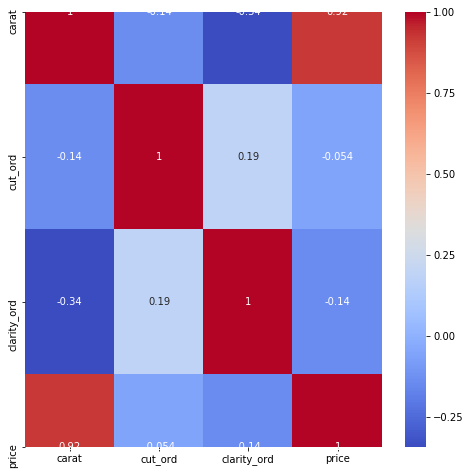

In [11]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = df[['carat', 'cut_ord', 'clarity_ord']]
y = df['price']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()

In [17]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
lm.score(X_train, y_train)

0.8871269426298755

In [19]:
# Printando a intercepção
print(lm.intercept_)

-5252.843024220081


In [20]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
carat,8380.397101
cut_ord,156.052621
clarity_ord,457.955269


<b> Respondendo a pergunta número 1: U$8.380,39 dólares

In [21]:
predictions = lm.predict(X_test)

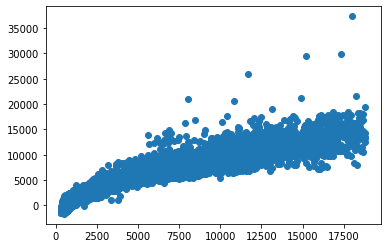

In [22]:
plt.scatter(y_test,predictions)

In [23]:
#Tentando melhorar o modelo
precisao_conjunto_treino = []
precisao_conjunto_teste = []

for numero in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = numero)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    
    precisao_conjunto_treino.append(lm.score(X_train, y_train))
    precisao_conjunto_teste.append(lm.score(X_test, y_test))

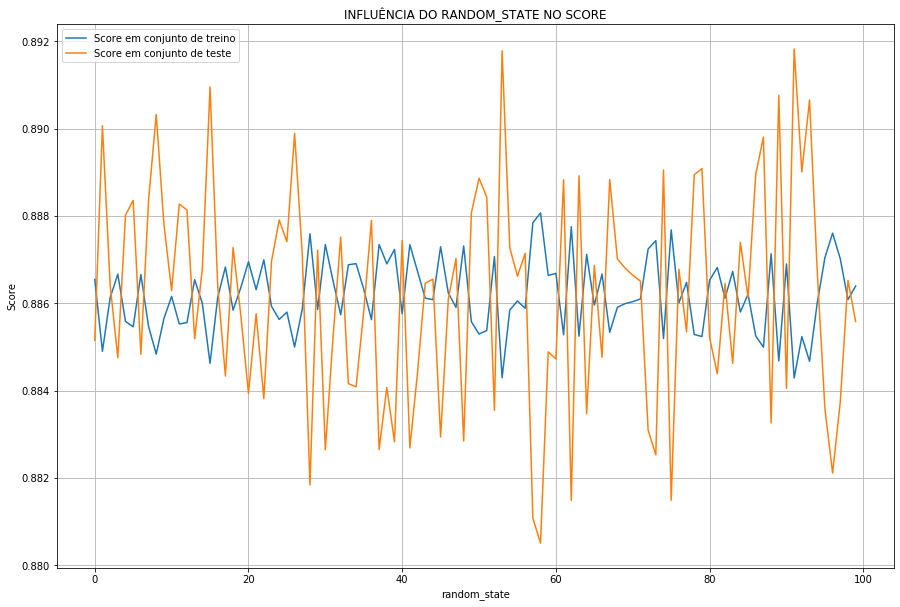

In [24]:
#Criando gráfico com cada 
plt.figure(figsize=(15, 10))
plt.grid()
plt.plot(precisao_conjunto_treino, label = 'Score em conjunto de treino')
plt.plot(precisao_conjunto_teste, label = 'Score em conjunto de teste')
plt.xlabel('random_state')
plt.ylabel('Score')
plt.title('INFLUÊNCIA DO RANDOM_STATE NO SCORE')
plt.legend()
plt.show()

In [25]:
#Armazenando em uma variável o melhor random_state e seu score
melhor_random_state = precisao_conjunto_teste.index(max(precisao_conjunto_teste))
melhor_score = max(precisao_conjunto_teste)

print('O melhor random_state de teste é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state de teste é: 91; que gera um score de: 0.8918209060882462


In [26]:
melhor_random_state = precisao_conjunto_treino.index(max(precisao_conjunto_treino))
melhor_score = max(precisao_conjunto_treino)

print('O melhor random_state de treino é: {}; que gera um score de: {}'.format(melhor_random_state, melhor_score))

O melhor random_state de treino é: 58; que gera um score de: 0.8880681445587734


In [27]:
import statsmodels.api as sm

In [28]:
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()

est.summary()

/home/felipe/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 1.298e+05
Date:                Sat, 09 May 2020   Prob (F-statistic):               0.00
Time:                        22:19:04   Log-Likelihood:            -4.3126e+05
No. Observations:               50000   AIC:                         8.625e+05
Df Residuals:                   49996   BIC:                         8.626e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5255.2231     30.320   -173.326      0.000   -5314.650   -5195.796
carat        8363.4167     13.565    616.547      0.000    8336.829    8390.004
cut_ord       160.3786      5.513     29.093      0.000     149.574     171.183
clarity_ord   457.8018      3.901    117.366      0.000     450.157     465.447
==============================================================================
Omnibus:                    11093.961   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           169582.750
Skew:                           0.651   Prob(JB):                         0.00
Kurtosis:                      11.928   Cond. No.                         31.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
df1 = pd.read_csv('New_Diamonds.csv', sep=',')
df1

,Unnamed: 0,Unnamed: 0.1,carat,cut,cut_ord,color,clarity,clarity_ord
0,0,1,1.22,Premium,4,G,SI1,3
1,1,2,1.01,Good,2,G,VS2,5
2,2,3,0.71,Very Good,3,I,VS2,5
3,3,4,1.01,Ideal,5,D,SI2,2
4,4,5,0.27,Ideal,5,H,VVS2,6
5,5,6,0.52,Premium,4,G,VS1,4
6,6,7,1.01,Premium,4,F,SI1,3
7,7,8,0.59,Ideal,5,D,SI1,3
8,8,9,1.01,Good,2,E,SI1,3
9,9,10,2.03,Ideal,5,F,SI2,2


In [30]:
del df1['Unnamed: 0']
del df1['Unnamed: 0.1']
del df1['color']

In [31]:
df1

,carat,cut,cut_ord,clarity,clarity_ord
0,1.22,Premium,4,SI1,3
1,1.01,Good,2,VS2,5
2,0.71,Very Good,3,VS2,5
3,1.01,Ideal,5,SI2,2
4,0.27,Ideal,5,VVS2,6
5,0.52,Premium,4,VS1,4
6,1.01,Premium,4,SI1,3
7,0.59,Ideal,5,SI1,3
8,1.01,Good,2,SI1,3
9,2.03,Ideal,5,SI2,2


In [32]:
df1['pred'] = (lm.intercept_+(df['carat']*8380.397101)+(df['cut_ord']*156.052621)+(df['clarity_ord']*457.955269))

In [33]:
df1['pred2'] = (-5255.2231+(df['carat']*8363.4167)+(df['cut_ord']*160.3786)+(df['clarity_ord']*457.8018))

In [38]:
pergunta2 = (lm.intercept_+(1.5*8380.397101)+(3*156.052621)+(5*457.955269))
pergunta2

10070.603325369031

<b> Resposta 2: O valor predito da pedra é no valor de U$10.070,60 dólares

In [39]:
df1['pred'].sum()

11755859.647213412

In [40]:
(df1['pred'].sum())*0.7

8229101.7530493885

In [41]:
(df1['pred2'].sum())*0.7

8240787.084350799

<b> Pergunta 3: Seguindo a recomendação do modelo, o valor do lance deveria ser de U$8.229.101 dólares. O segundo modelo gerado com base no pacote estatístico statsmodel ficou em acima do valor predito pelo primeiro modelo </b>.



# Por fim, o modelo não apresenta problema como o underfitting e o overfitting. 
